In [1]:
## Importing Libraries and Reading Files

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
movies = pd.read_csv(r"D:/Desktop/movie_data/movies.csv")

In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
movies.shape

(9742, 3)

In [6]:
ratings = pd.read_csv(r"D:/Desktop/movie_data/ratings.csv")

In [7]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
ratings.shape

(100836, 4)

In [9]:
ratings["userId"].nunique()

610

In [10]:
## Movie recieved maximum number of user ratings
ratings_count = ratings.groupby("movieId")["rating"].count()
max_rated = ratings_count.idxmax()
movies.loc[movies["movieId"] == max_rated, "title"].iloc[0]

'Forrest Gump (1994)'

In [11]:
tags = pd.read_csv(r"D:/Desktop/movie_data/tags.csv")

In [12]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [13]:
## Tags submitted by users to "Matrix, The (1999)" movie

In [14]:
# Get the movie ID for "Matrix, The (1999)"
matrix_movie_id = movies.loc[movies["title"] == "Matrix, The (1999)", "movieId"].iloc[0]

# Join the tags with the movies on the movie ID column
movie_tags = pd.merge(tags, movies, on="movieId")

# Filter the results to only include tags for the "Matrix, The (1999)" movie
matrix_tags = movie_tags.loc[movie_tags["movieId"] == matrix_movie_id, ["tag"]]

# Print the unique tags
unique_tags = matrix_tags["tag"].unique()
print(unique_tags)

['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [15]:
## The average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [16]:
terminator_movie_id = movies.loc[movies["title"] == "Terminator 2: Judgment Day (1991)", "movieId"].iloc[0]

# Filter the ratings to only include ratings for the "Terminator 2: Judgment Day (1991)" movie
terminator_ratings = ratings.loc[ratings["movieId"] == terminator_movie_id, "rating"]

# Calculate the average rating
average_rating = terminator_ratings.mean()

print(average_rating)

3.970982142857143


In [17]:
## The data distribution of user ratings for "Fight Club (1999)" movie 

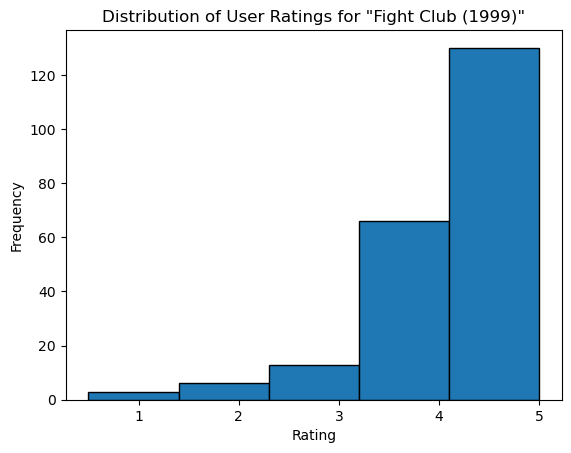

In [18]:
# Get the movie ID for "Fight Club (1999)"
fight_club_movie_id = movies.loc[movies["title"] == "Fight Club (1999)", "movieId"].iloc[0]

# Filter the ratings to only include ratings for the "Fight Club (1999)" movie
fight_club_ratings = ratings.loc[ratings["movieId"] == fight_club_movie_id, "rating"]

# Create a histogram of the ratings
plt.hist(fight_club_ratings, bins=5, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.show()

In [19]:
## Grouping the user ratings based on movieId and apply aggregation operations like count and mean on ratings
grouped_ratings = ratings.groupby("movieId")["rating"].agg(["count", "mean"]).reset_index()
print(grouped_ratings.head())

   movieId  count      mean
0        1    215  3.920930
1        2    110  3.431818
2        3     52  3.259615
3        4      7  2.357143
4        5     49  3.071429


In [20]:
## Applying inner join on dataframe created from movies.csv and the grouped df from step 1
merged_df = pd.merge(movies, grouped_ratings, on="movieId", how="inner")
print(merged_df.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  count      mean  
0  Adventure|Animation|Children|Comedy|Fantasy    215  3.920930  
1                   Adventure|Children|Fantasy    110  3.431818  
2                               Comedy|Romance     52  3.259615  
3                         Comedy|Drama|Romance      7  2.357143  
4                                       Comedy     49  3.071429  


In [21]:
## Filtering only those movies which have more than 50 user ratings (i.e. > 50)
filtered_df = merged_df[merged_df["count"] > 50]
print(filtered_df.head())

   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
5        6              Heat (1995)   
6        7           Sabrina (1995)   

                                        genres  count      mean  
0  Adventure|Animation|Children|Comedy|Fantasy    215  3.920930  
1                   Adventure|Children|Fantasy    110  3.431818  
2                               Comedy|Romance     52  3.259615  
5                        Action|Crime|Thriller    102  3.946078  
6                               Comedy|Romance     54  3.185185  


In [22]:
## The most popular based on  average user ratings
most_popular_movie = filtered_df.sort_values("mean", ascending=False).head(1)
print(most_popular_movie[["title", "mean"]])

                                title      mean
277  Shawshank Redemption, The (1994)  4.429022


In [23]:
## Sorting the filtered_df in descending order based on rating_count
top_5_movies = filtered_df.sort_values("count", ascending=False).head(5)
print(top_5_movies[["title", "count"]])

                                 title  count
314                Forrest Gump (1994)    329
277   Shawshank Redemption, The (1994)    317
257                Pulp Fiction (1994)    307
510   Silence of the Lambs, The (1991)    279
1938                Matrix, The (1999)    278


In [24]:
## Filtering the dataframe to only include Sci-Fi movies
scifi_movies = filtered_df[filtered_df['genres'].str.contains('Sci-Fi')]

## Sorting the sci-fi_movies in descending order based on rating_count
scifi_movies_sorted = scifi_movies.sort_values("count", ascending=False)

third_most_popular_scifi = scifi_movies_sorted.iloc[2]
print(third_most_popular_scifi[["title", "count"]])

title    Jurassic Park (1993)
count                     238
Name: 418, dtype: object


In [25]:
## Scrapping the IMDB reviews of each movie with more than 50 user ratings
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating = soup.find('div', attrs={'class' : 'rating'})
    return imdb_rating.text if imdb_rating else np.nan

In [26]:
links = pd.read_csv("D:/Desktop/movie_data/links.csv")
print(links.head())

   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0


In [27]:
merged_df = pd.merge(filtered_df, links, on='movieId', how='inner')
print(merged_df.head())

   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
3        6              Heat (1995)   
4        7           Sabrina (1995)   

                                        genres  count      mean  imdbId  \
0  Adventure|Animation|Children|Comedy|Fantasy    215  3.920930  114709   
1                   Adventure|Children|Fantasy    110  3.431818  113497   
2                               Comedy|Romance     52  3.259615  113228   
3                        Action|Crime|Thriller    102  3.946078  113277   
4                               Comedy|Romance     54  3.185185  114319   

    tmdbId  
0    862.0  
1   8844.0  
2  15602.0  
3    949.0  
4  11860.0  


In [ ]:
#results = [scrapper(imdbId) for imdbId in merged_df['imdbId']]
#print(results)

In [ ]:
# assuming df is your DataFrame with movie ratings
movie_with_highest_rating = merged_df.loc[results['imdb_rating'].idxmax()]
print(movie_with_highest_rating['movieId'])